In [114]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
# Загрузите данные из CSV файла
all_data = pd.read_csv('/content/drive/My Drive/statpr.csv')
all_data.drop(['ID' ], axis= 1 , inplace= True )
all_data.fillna(0, inplace=True)
all_data

,Student,Python basics,Numpy & Matplotlib,Random,Pandas,kNN,Project,Clustering
0,Агаева Эмилия Назимовна,5.0,2.0,7.0,1.0,0.0,0.0,1.0
1,Бауман Артём Георгиевич,2.5,2.0,3.0,1.0,1.0,1.0,0.0
2,Вехов Иван Олегович,6.0,2.0,7.0,1.0,1.0,1.0,0.0
3,Егоров Кирилл Сергеевич,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Килимчук Иван Вячеславович,5.0,2.0,7.0,1.0,1.0,1.0,0.0
5,Кираев Булат Рустамович,6.0,2.0,7.0,1.0,1.0,1.0,0.0
6,Козлов Глеб Денисович,5.0,2.0,7.0,1.0,1.0,1.0,0.0
7,Корнийчук Павел Павлович,4.5,2.0,6.5,0.0,0.0,1.0,0.0
8,Мирошниченко Никита Игоревич,5.5,2.0,7.0,1.0,1.0,1.0,1.0
9,Родионова Мария Романовна,5.0,2.0,8.0,1.0,1.0,1.0,0.0


Преобразуем нашу таблицу. Отбросим стобец с повторяющимися именнами, а также со ссылкой на github.
Оставим только столбцы с суммой баллов за тему, убрав баллы за задания.
То  есть будем считать баллы по темам, а не по столбикам.

Заполним пустые ячейки с баллами значением 0,а баллы за проект умножим на 2, так как он более весомый, чем обычное домашнее задание

In [129]:
# Список столбцов, которые нужно преобразовать в числа
numeric_columns = ['Python basics', 'Numpy & Matplotlib', 'Random', 'Pandas', 'kNN', 'Clustering','Project']

# Преобразование значений в указанных столбцах в числа, нечисловые значения становятся NaN
all_data[numeric_columns] = all_data[numeric_columns].astype (float)

In [137]:
#посчитаем сумму баллов
all_data['Summa'] = all_data[numeric_columns].sum(axis=1)
all_data.loc[:,['Student','Summa']]

,Student,Summa
0,Агаева Эмилия Назимовна,16.0
1,Бауман Артём Георгиевич,10.5
2,Вехов Иван Олегович,18.0
3,Егоров Кирилл Сергеевич,1.0
4,Килимчук Иван Вячеславович,17.0
5,Кираев Булат Рустамович,18.0
6,Козлов Глеб Денисович,17.0
7,Корнийчук Павел Павлович,14.0
8,Мирошниченко Никита Игоревич,18.5
9,Родионова Мария Романовна,18.0


Создадим 3 кластера

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


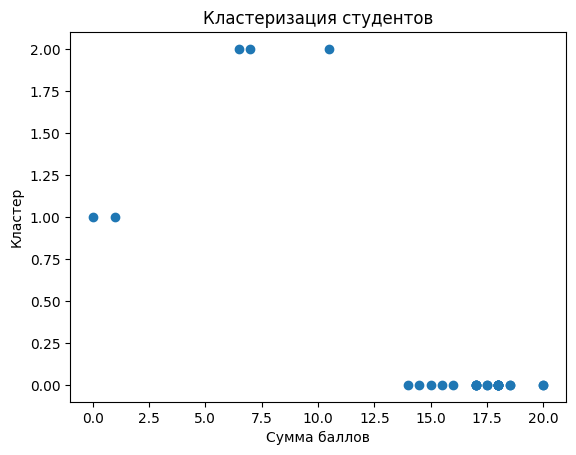

                          Student  Summa   cluster
17            Горностаев Геннадий    0.0  на зачет
3         Егоров Кирилл Сергеевич    1.0  на зачет
14              Бакланов Владимир    6.5  не зачет
10        Садыков Артур Маратович    7.0  не зачет
1         Бауман Артём Георгиевич   10.5  не зачет
7        Корнийчук Павел Павлович   14.0   автомат
11        Сёмин Михаил Максимович   14.5   автомат
13        Яранцев Егор Евгеньевич   15.0   автомат
24                   Русанов Эрик   15.5   автомат
0         Агаева Эмилия Назимовна   16.0   автомат
6           Козлов Глеб Денисович   17.0   автомат
27                 Шипицын Матвей   17.0   автомат
15              Виноградова Мария   17.0   автомат
16                   Гладков Иван   17.0   автомат
4      Килимчук Иван Вячеславович   17.0   автомат
26                   Тылык Даниил   17.5   автомат
25              Тарасюк Екатерина   17.5   автомат
19                  Зайцев Даниил   18.0   автомат
2             Вехов Иван Олегов

In [175]:
# Используем метод KMeans для разделения на 3 кластера
kmeans = KMeans(n_clusters=3)
all_data['cluster'] = kmeans.fit_predict(all_data[['Summa']])

# Визуализация результатов
plt.scatter(all_data[['Summa']], all_data['cluster'])
plt.title('Кластеризация студентов')
plt.xlabel('Сумма баллов')
plt.ylabel('Кластер')
plt.show()


# Теперь у нас есть новая колонка 'cluster', которая указывает кластер для каждого студента
# Мы можем переименовать кластеры в соответствии с вашими категориями
cluster_mapping = {
    2: 'не зачет',
    0: 'автомат',
    1: 'на зачет'
}

all_data['cluster'] = all_data['cluster'].map(cluster_mapping)

# Сохраняем результат в новый CSV файл
all_data.to_csv('кластеризованные_студенты.csv', index=False)

cluster_counts = all_data['cluster'].value_counts()

# Выводим первые несколько строк отсортированной таблицы для проверки
print(all_data.loc[:,['Student','Summa','cluster']].sort_values('Summa'))
print(cluster_counts)


In [181]:
# Загрузите данные из CSV файла

data = pd.read_csv('/content/drive/My Drive/r.csv')
data

,Student,Pass
0,Агаева Эмилия Назимовна,0
1,Бауман Артём Георгиевич,1
2,Вехов Иван Олегович,1
3,Егоров Кирилл Сергеевич,0
4,Килимчук Иван Вячеславович,1
5,Кираев Булат Рустамович,1
6,Козлов Глеб Денисович,1
7,Корнийчук Павел Павлович,0
8,Мирошниченко Никита Игоревич,1
9,Родионова Мария Романовна,1


In [183]:
sum = data['Pass'].sum()
print(sum)

20


Значит, я не права с точностью: (24-20)/24 *100% =17%